In [1]:
# melakukan import beberapa package 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('asia_cup_team_dataset.csv')
x = dataset.iloc[:, [3,5]].values
y = dataset.iloc[:, -1].values

In [3]:
dataset = pd.read_csv('asia_cup_team_dataset.csv')
dataset.keys()

Index(['no ', 'team', 'menang', 'seri', 'kalah', 'point', 'jumlah gol',
       'status'],
      dtype='object')

In [4]:
dataset = pd.read_csv('asia_cup_team_dataset.csv')
dataset

,no,team,menang,seri,kalah,point,jumlah gol,status
0,1,Suriah,2,1,0,7,15,1
1,2,Australia,0,0,3,0,-8,0
2,3,Iran,1,1,1,4,9,0
3,4,Arab Saudi,2,0,1,6,5,0
4,5,Qatar,3,0,0,9,12,1
5,6,Jepang,3,0,0,9,20,1
6,7,Uni Emirat Arab,0,1,2,1,9,0
7,8,Korea Selatan,1,2,0,5,7,0
8,9,China,3,0,0,9,12,1
9,10,Oman,1,0,2,3,4,0


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [7]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [14]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[6]]


In [11]:
y_actual = pd.Series([1,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0], name = 'actual')
y_pred = pd.Series([0,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0], name = 'prediction')
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,0,1
actual,,
0,16,2
1,2,5


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


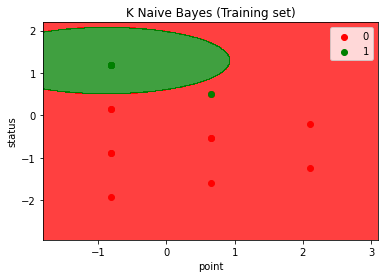

In [12]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label =j)
plt.title('K Naive Bayes (Training set)')
plt.xlabel('point')
plt.ylabel('status')
plt.legend()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


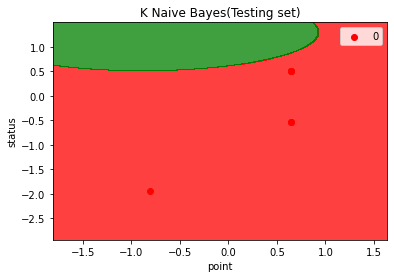

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
                c = ListedColormap(('red', 'green'))(i), label =j)
plt.title('K Naive Bayes(Testing set)')
plt.xlabel('point')
plt.ylabel('status')
plt.legend()
plt.show()
